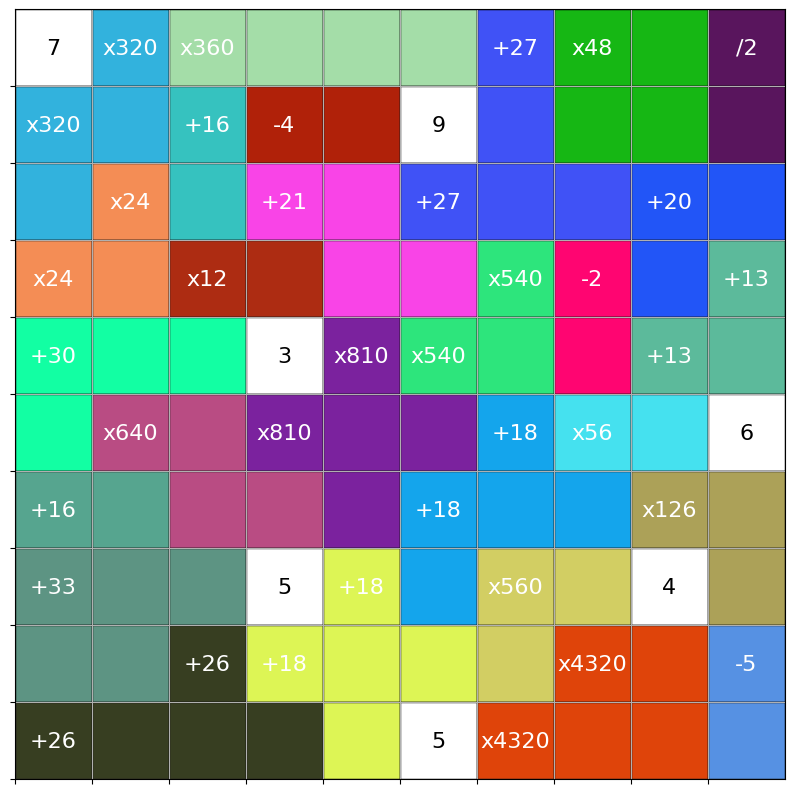

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def generate_unique_hex_color(existing_colors):
    while True:
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        if color not in existing_colors:
            return color

existing_colors = set()

cages = {
    'A': {'label': 'x320', 'operation': 'x'},
    'B': {'label': 'x24', 'operation': 'x'},
    'C': {'label': '+30', 'operation': '+'},
    'D': {'label': '+16', 'operation': '+'},
    'E': {'label': '+36', 'operation': '+'},
    'F': {'label': '+26', 'operation': '+'},
    'G': {'label': 'x360', 'operation': 'x'},
    'H': {'label': '+21', 'operation': '+'},
    'I': {'label': '+33', 'operation': '+'},
    'J': {'label': 'x12', 'operation': 'x'},
    'K': {'label': 'x640', 'operation': 'x'},
    'L': {'label': '-4', 'operation': '-'},
    'M': {'label': 'x810', 'operation': 'x'},
    'N': {'label': '+16', 'operation': '+'},
    'O': {'label': 'x540', 'operation': 'x'},
    'P': {'label': '+27', 'operation': '+'},
    'Q': {'label': '+18', 'operation': '+'},
    'R': {'label': 'x560', 'operation': 'x'},
    'S': {'label': '+18', 'operation': '+'},
    'T': {'label': 'x540', 'operation': 'x'},
    'U': {'label': '+27', 'operation': '+'},
    'V': {'label': '+18', 'operation': '+'},
    'W': {'label': 'x560', 'operation': 'x'},
    'X': {'label': '-2', 'operation': '-'},
    'Y': {'label': '+20', 'operation': '+'},
    'Z': {'label': 'x56', 'operation': 'x'},
    'A1': {'label': '/2', 'operation': '/'},
    'B1': {'label': '+13', 'operation': '+'},
    'C1': {'label': 'x48', 'operation': 'x'},
    'D1': {'label': 'x126', 'operation': 'x'},
    'E1': {'label': '-5', 'operation': '-'},
    'F1': {'label': 'x4320', 'operation': 'x'},
}

for key, value in cages.items():
    color = generate_unique_hex_color(existing_colors)
    existing_colors.add(color)
    value['color'] = color

kenken = [
    [7, 'A', 'G', 'G', 'G', 'G', 'P', 'C1', 'C1', 'A1'],
    ['A', 'A', 'N', 'L', 'L', 9, 'P', 'C1', 'C1', 'A1'],
    ['A', 'B', 'N', 'H', 'H', 'P', 'P', 'P', 'Y', 'Y'],
    ['B', 'B', 'J', 'J', 'H', 'H', 'T', 'X', 'Y', 'B1'],
    ['C', 'C', 'C', 3, 'M', 'T', 'T', 'X', 'B1', 'B1'],
    ['C', 'K', 'K', 'M', 'M', 'M', 'S', 'Z', 'Z', 6],
    ['D', 'D', 'K', 'K', 'M', 'S', 'S', 'S', 'D1', 'D1'],
    ['I', 'I', 'I', 5, 'Q', 'S', 'W', 'W', 4, 'D1'],
    ['I', 'I', 'F', 'Q', 'Q', 'Q', 'W', 'F1', 'F1', 'E1'],
    ['F', 'F', 'F', 'F', 'Q', 5, 'F1', 'F1', 'F1', 'E1']
]
size=10

fixed_values = {
    
  
}

fig, ax = plt.subplots(figsize=(10, 10)) 

for i in range(size):
    for j in range(size):
        # Obtener operación y color asociados con la celda
        op = cages.get(kenken[i][j], {'color': 'white', 'label': ''})

        # Dibuja el rectángulo
        rect = patches.Rectangle((j, size - i - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=op['color'])
        ax.add_patch(rect)

        # Añade el texto correspondiente (etiqueta del "cage" o número)
        if isinstance(kenken[i][j], str):  # Para las celdas de "cages"
            label = op.get('label', '')  # Si no hay etiqueta, cadena vacía
            # Mostrar la etiqueta solo si es el inicio de un nuevo "cage"
            if (i == 0 and j == 0) or (kenken[i][j] != kenken[i - 1][j] and kenken[i][j] != kenken[i][j - 1]):
                ax.text(j + 0.5, size - i - 0.5, label, ha='center', va='center', color='white', fontsize=16)
        else:  # Para los números en el tablero
            ax.text(j + 0.5, size - i - 0.5, str(kenken[i][j]), ha='center', va='center', fontsize=16)

ax.set_xlim(0, size)
ax.set_ylim(0, size)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
plt.grid(True)

plt.show()


In [42]:
pip install python-constraint

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24084 sha256=f018072e4b76ac96136db3060c4a9cf7b46e5e2daa1bfc01ad502901414d5d7e
  Stored in directory: c:\users\sebas\appdata\local\pip\cache\wheels\1e\af\a9\990ae7e6a78319b7d7afaab2d14e7e5ae349d5613db5ae28fd
Successfully built python-constraint
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from constraint import Problem, AllDifferentConstraint
import numpy as np
import operator

# Tamaño del tablero
size = 10

# Definir el problema CSP
problem = Problem()

# Dominio para las celdas
domain = list(range(1, size + 1))

# Añadir variables al problema
for i in range(size):
    for j in range(size):
        problem.addVariable((i, j), domain)

# Restricciones para filas y columnas
for i in range(size):
    # Restricciones de filas
    problem.addConstraint(AllDifferentConstraint(), [(i, j) for j in range(size)])
    # Restricciones de columnas
    problem.addConstraint(AllDifferentConstraint(), [(j, i) for j in range(size)])

# Operaciones permitidas para los "cages"
operations = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.truediv
}

# Función para crear restricciones para un "cage"
def create_cage_constraint(operation, target, cells):
    def cage_constraint(values):
        # Aplicar la operación a los valores y verificar si cumple con el objetivo
        result = None
        if operation == '+':
            result = sum(values)
        elif operation == '-':
            # Para restas, probar todas las combinaciones
            possible_results = {abs(x - y) for x in values for y in values}
            result = possible_results
        elif operation == '*':
            result = 1
            for val in values:
                result *= val
        elif operation == '/':
            # Para divisiones, probar todas las combinaciones
            possible_results = {max(x, y) / min(x, y) for x in values for y in values if min(x, y) != 0}
            result = possible_results
        # Verificar si el resultado coincide con el objetivo
        if isinstance(result, set):
            return target in result
        else:
            return result == target
    return cage_constraint

# Agregar restricciones para cada "cage"
cage_assignments = {
    'A': [(0, 1), (1, 0), (1, 1)],
    'G': [(0, 2), (0, 3), (0, 4), (0, 5)],
    'C1': [(0, 7), (0, 8), (1, 7), (1, 8)],
    'A1': [(0, 9), (1, 9)],
    'N': [(1, 2), (2, 2)],
    'L': [(1, 3), (1, 4)],
    'P': [(0, 6), (1, 6), (2, 6), (2, 7)],
    'H': [(2, 3), (2, 4), (3, 4)],
    'J': [(3, 2), (3, 3)],
    'X': [(3, 7), (4, 7)],
    'B': [(1, 1), (2, 1), (3, 1)],
    'M': [(4, 4), (5, 3), (5, 4), (5, 5)],
    'K': [(4, 2), (5, 1), (5, 2), (6, 1)],
    'S': [(5, 6), (6, 6), (6, 5), (7, 5)],
    'D1': [(6, 8), (7, 8), (7, 7)],
    'Z': [(5, 7), (5, 8)],
    'D': [(6, 0), (7, 0)],
    'T': [(3, 5), (4, 5), (4, 6)],
    'W': [(7, 6), (8, 6)],
    'Y': [(2, 8), (3, 8), (2, 9)],
    'B1': [(3, 9), (4, 8), (4, 9)],
    'Q': [(8, 3), (7, 3), (9, 4)],
    'I': [(7, 1), (7, 2), (7, 3)],
    'F': [(8, 0), (9, 0), (9, 1), (9, 2)],
    'F1': [(8, 7), (8, 8), (9, 6)],
    'E1': [(8, 9), (9, 8), (9, 7)]
}

# Manejo de errores por 'label' o 'operation'
for cage, cells in cage_assignments.items():
    try:
        # Validar si el 'cage' está en 'cages'
        if cage not in cages:
            raise KeyError(f"El 'cage' {cage} no está en el diccionario de 'cages'")
        
        # Obtener el valor objetivo
        label = cages[cage]['label']
        
        # Verificar que 'label' tiene al menos un carácter y comienza con un operador
        if not label or label[0] not in operations:
            raise ValueError(f"Etiqueta '{label}' para 'cage' {cage} no tiene formato esperado")
        
        target_value = int(label[1:])
        
        operation = cages[cage]['operation']  # Obtener la operación
        
        # Crear la restricción del "cage"
        constraint = create_cage_constraint(operation, target_value, cells)
        
        # Añadir la restricción al problema
        problem.addConstraint(constraint, cells)
    
    except KeyError as e:
        print(f"Error: {e}")
    
    except ValueError as e:
        print(f"Error: {e}")

# Resolver el problema
solution = problem.getSolutions()

# Si hay solución, mostrar la matriz
if solution:
    solution_matrix = np.zeros((size, size), dtype=int)

    for (i, j), value in solution[0].items():
        solution_matrix[i][j] = value

    print("Solución encontrada:")
    print(solution_matrix)

else:
    print("No se encontró solución.")

